In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
RESULTS_DIR = 'results'
sns.set_theme(style="whitegrid", font_scale=1.2)

## Study 1: Analytic vs. Empirical Sensitivity Check

**Objective:** Validates that the paper's analytic sensitivity bound Δ₂ is a safe, upper bound on the true empirical sensitivity.

/Users/yuding/miniforge3/envs/ml1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


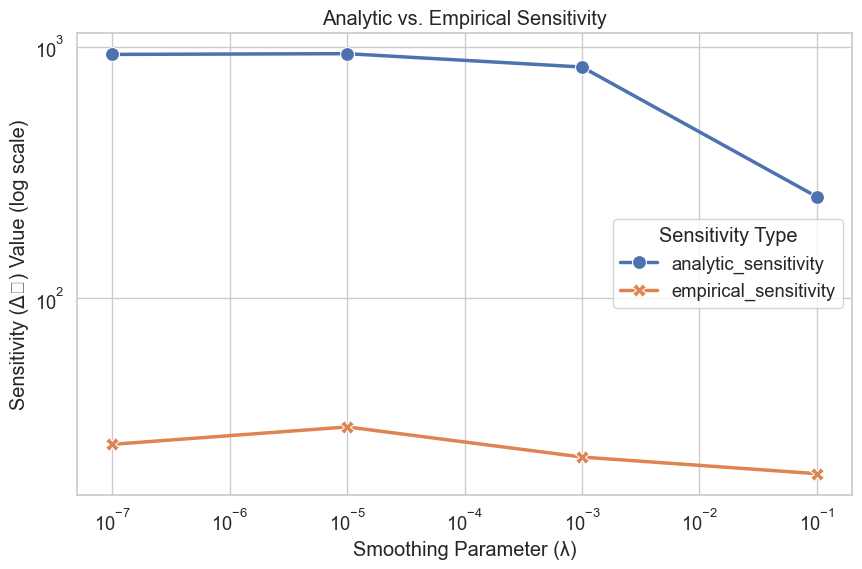

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'sensitivity_check/results.csv'))
df_agg = df.groupby('lambda').mean().reset_index()
df_plot = pd.melt(df_agg, id_vars=['lambda'], value_vars=['analytic_sensitivity', 'empirical_sensitivity'], var_name='Sensitivity Type', value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot, x='lambda', y='Value', hue='Sensitivity Type', style='Sensitivity Type', markers=True, dashes=False, lw=2.5, markersize=10).set(
    xscale='log', yscale='log', 
    xlabel='Smoothing Parameter (λ)', 
    ylabel='Sensitivity (Δ₂) Value (log scale)', 
    title='Analytic vs. Empirical Sensitivity'
)
plt.legend(title='Sensitivity Type'); plt.show()

## Study 2: Public-Bound Mis-specification Stress Test

**Objective:** Shows the model's robustness if the public energy bound `B_public` is slightly under- or over-estimated.

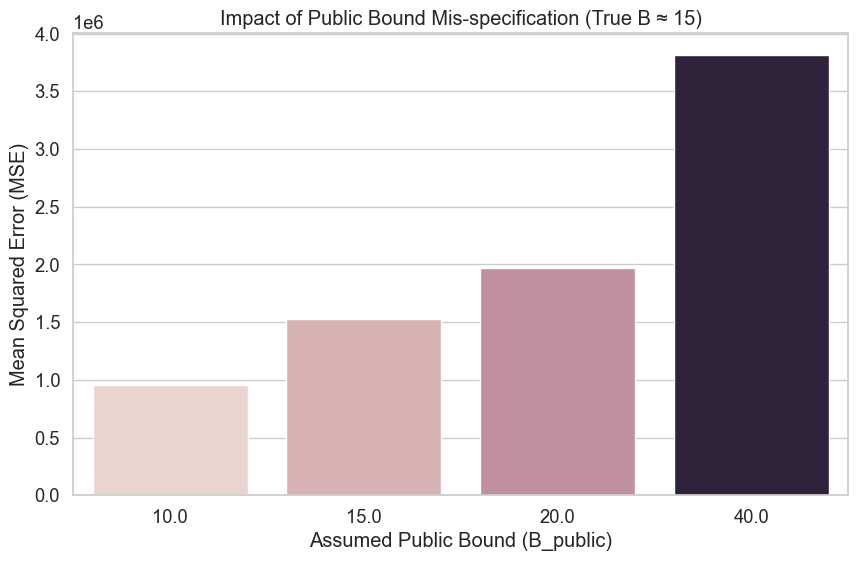

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'harmonisation_mis_specification/results.csv'))
df_agg = df.groupby('B_public').mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agg, x='B_public', y='mse', hue='B_public', dodge=False).set(
    xlabel='Assumed Public Bound (B_public)', 
    ylabel='Mean Squared Error (MSE)', 
    title='Impact of Public Bound Mis-specification (True B ≈ 15)'
)
plt.legend([],[], frameon=False); plt.show()

## Study 3: Basis Mis-specification Ablation

**Objective:** Demonstrates that S2DP still works effectively if the analyst picks a sub-optimal basis.

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'basis_ablation/results.csv'))
df_agg = df.groupby('basis_family').mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agg, x='basis_family', y='mse', hue='basis_family').set(
    xlabel='Basis Family',
    ylabel='Mean Squared Error (MSE)',
    title='Impact of Basis Mis-specification on Model Utility'
)
plt.legend([],[], frameon=False); plt.show()

EmptyDataError: No columns to parse from file

## Study 4: Scalability Analysis

**Objective:** Measures wall-clock runtime and total communication bytes as a function of key problem dimensions.

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'scalability/results.csv'))
df_agg = df.groupby(['n_subjects', 'n_parties', 'M_rounds']).mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.lineplot(data=df_agg, x='n_subjects', y='runtime', hue='n_parties', style='M_rounds', marker='o', ax=axes[0]).set(
    title='Runtime vs. Number of Subjects',
    xlabel='Number of Subjects (n)',
    ylabel='Wall-Clock Time (seconds)'
)
sns.lineplot(data=df_agg, x='n_parties', y='comms_bytes', hue='n_subjects', style='M_rounds', marker='o', ax=axes[1]).set(
    title='Communication Cost vs. Number of Parties',
    xlabel='Number of Parties (K)',
    ylabel='Total Bytes Transmitted'
)
fig.tight_layout(); plt.show()

## Study 5: Attribute Inference Attack (AIA)

**Objective:** Implements a strong privacy test where an attacker attempts to infer a sensitive binary attribute.

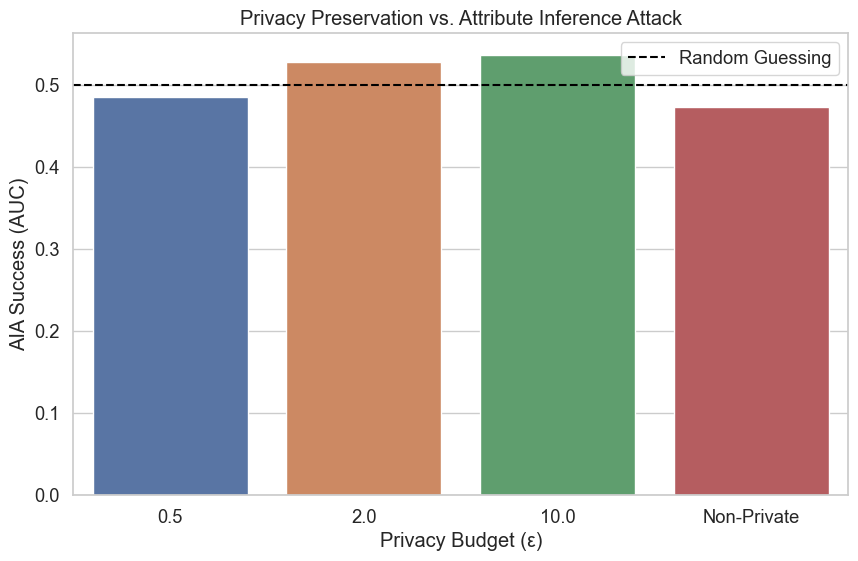

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'attribute_inference_attack/results.csv'))
df_agg = df.groupby('epsilon').mean().reset_index()
df_agg['epsilon'] = df_agg['epsilon'].astype(str).replace('inf', 'Non-Private')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agg, x='epsilon', y='auc', hue='epsilon', dodge=False).set(
    xlabel='Privacy Budget (ε)',
    ylabel='AIA Success (AUC)',
    title='Privacy Preservation vs. Attribute Inference Attack'
)
plt.axhline(y=0.5, color='black', linestyle='--', label='Random Guessing')
plt.legend(); plt.show()

## Study 6: Party Drop-out Scenario

**Objective:** Tests robustness to intermittent vs. permanent party drop-out.

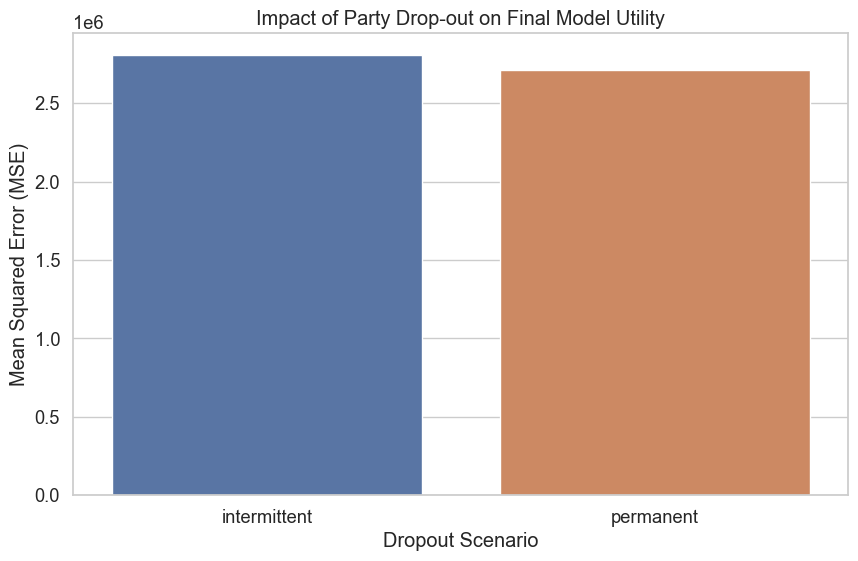

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'party_dropout/results.csv'))
df_agg = df.groupby('dropout_mode').mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agg, x='dropout_mode', y='mse', hue='dropout_mode').set(
    xlabel='Dropout Scenario',
    ylabel='Mean Squared Error (MSE)',
    title='Impact of Party Drop-out on Final Model Utility'
)
plt.show()

## Study 7: Central vs. Local DP

**Objective:** Shows the utility cost of local privacy versus a trusted central curator.

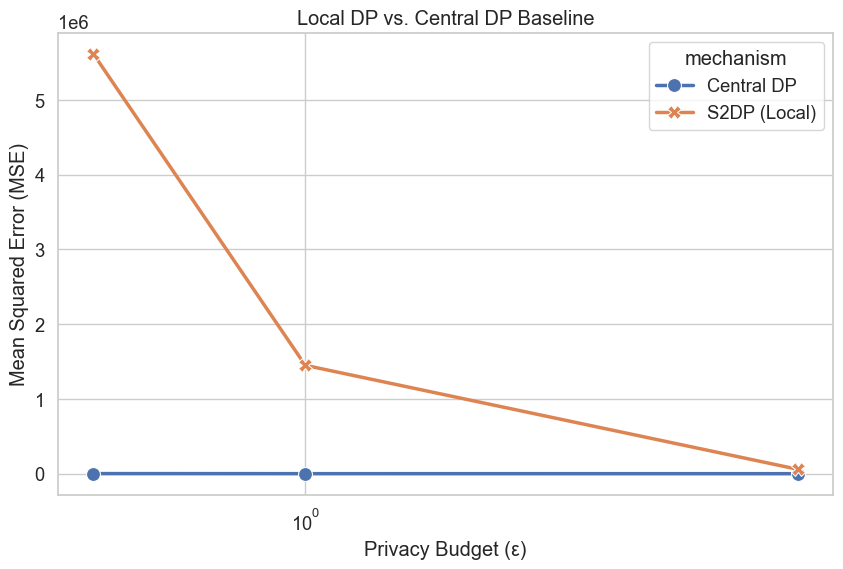

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'central_vs_local_dp/results.csv'))
df_agg = df.groupby(['epsilon', 'mechanism']).mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agg, x='epsilon', y='mse', hue='mechanism', style='mechanism', markers=True, dashes=False, lw=2.5, markersize=10).set(
    xscale='log',
    xlabel='Privacy Budget (ε)',
    ylabel='Mean Squared Error (MSE)',
    title='Local DP vs. Central DP Baseline'
)
plt.show()

## Study 8: Heavy-Tailed Error Distribution

**Objective:** Checks robustness to non-Gaussian errors.

In [ ]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'heavy_tailed_error/results.csv'))
print('MSE under Student-t (df=3) error:')
print(df['mse'].mean())

MSE under Student-t (df=3) error:
1999748.2448935683
